In [79]:
import pandas as pd
import pathlib as Path
import matplotlib.pyplot as plt

In [80]:
# Setting up the Dataframe
file_path = "Resources/diabetes_dataset.csv"

dm_pd = pd.read_csv(file_path)

dm_pd.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [81]:
new_column_names = {
    'hbA1c_level': 'A1C',
    'blood_glucose_level': 'RBG',
    'hypertension': 'HTN',
    'race:AfricanAmerican': 'AfricanAmerican',
    'race:Asian': 'Asian',
    'race:Caucasian': 'Caucasian',
    'race:Hispanic': 'Hispanic',
    'race:Other': 'Other'
}

# Rename the columns in the DataFrame
dm_pd.rename(columns=new_column_names, inplace=True)

In [82]:
# Viewing the size and columns of the Dataframe
print(dm_pd.shape)
print(dm_pd.columns)

(100000, 16)
Index(['year', 'gender', 'age', 'location', 'AfricanAmerican', 'Asian',
       'Caucasian', 'Hispanic', 'Other', 'HTN', 'heart_disease',
       'smoking_history', 'bmi', 'A1C', 'RBG', 'diabetes'],
      dtype='object')


In [83]:
# Obtaining summary statistics for the non-Boolean columns
dm_pd[['bmi','A1C','RBG']].describe()

,bmi,A1C,RBG
count,100000.000000,100000.000000,100000.000000
mean,27.320767,5.527507,138.058060
std,6.636783,1.070672,40.708136
min,10.010000,3.500000,80.000000
25%,23.630000,4.800000,100.000000
50%,27.320000,5.800000,140.000000
75%,29.580000,6.200000,159.000000
max,95.690000,9.000000,300.000000


In [84]:
# Getting counts of how many do not have DM (0) vs. how many have DM (1)
dm_pd['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [85]:
dm_pd['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [86]:
# Filter the DataFrame to include only rows where 'diabetes' is 1
diabetes_positive = dm_pd[dm_pd['diabetes'] == 1]

diabetes_positive.head()

,year,gender,age,location,AfricanAmerican,Asian,Caucasian,Hispanic,Other,HTN,heart_disease,smoking_history,bmi,A1C,RBG,diabetes
14,2016,Female,64.0,Alabama,0,0,0,0,1,0,0,ever,49.27,8.2,140,1
29,2016,Male,80.0,Alabama,1,0,0,0,0,0,0,former,29.16,8.8,140,1
32,2016,Female,42.0,Alabama,0,0,0,0,1,0,0,current,27.32,7.5,130,1
34,2016,Male,67.0,Alabama,0,0,0,1,0,0,1,No Info,35.48,6.8,200,1
35,2016,Female,80.0,Alabama,0,0,0,1,0,0,1,never,26.00,7.5,200,1


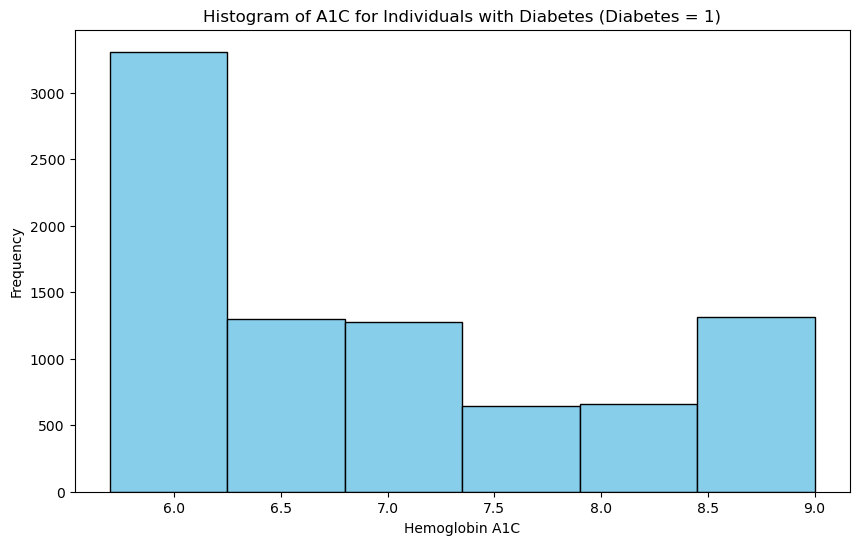

In [87]:
# Create a histogram of individuals with diabetes
plt.figure(figsize=(10, 6))
plt.hist(diabetes_positive['A1C'], bins=6, color='skyblue', edgecolor='black')
plt.xlabel('Hemoglobin A1C')
plt.ylabel('Frequency')
plt.title('Histogram of A1C for Individuals with Diabetes (Diabetes = 1)')
plt.show()

- In the graph above, it seems to show that there are a higher number of indivduals with Diabetes whose HgbA1C levels are around 6.0%.

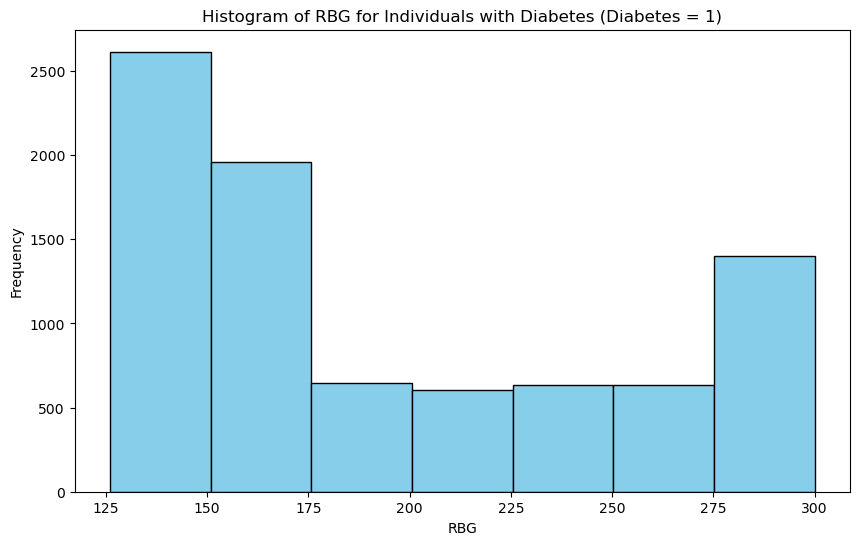

In [88]:
# Create a histogram of individuals with diabetes
plt.figure(figsize=(10, 6))
plt.hist(diabetes_positive['RBG'], bins=7, color='skyblue', edgecolor='black')
plt.xlabel('RBG')
plt.ylabel('Frequency')
plt.title('Histogram of RBG for Individuals with Diabetes (Diabetes = 1)')
plt.show()

- In the graph above, diabetics have an RBG at a range of 125-175. There was also a considerable amount of diabetics who have an RBG of 275-300.

Value counts for AfricanAmerican:
AfricanAmerican
1    1768
Name: count, dtype: int64

Value counts for Asian:
Asian
1    1743
Name: count, dtype: int64

Value counts for Caucasian:
Caucasian
1    1670
Name: count, dtype: int64

Value counts for Hispanic:
Hispanic
1    1676
Name: count, dtype: int64

Value counts for Other:
Other
1    1643
Name: count, dtype: int64



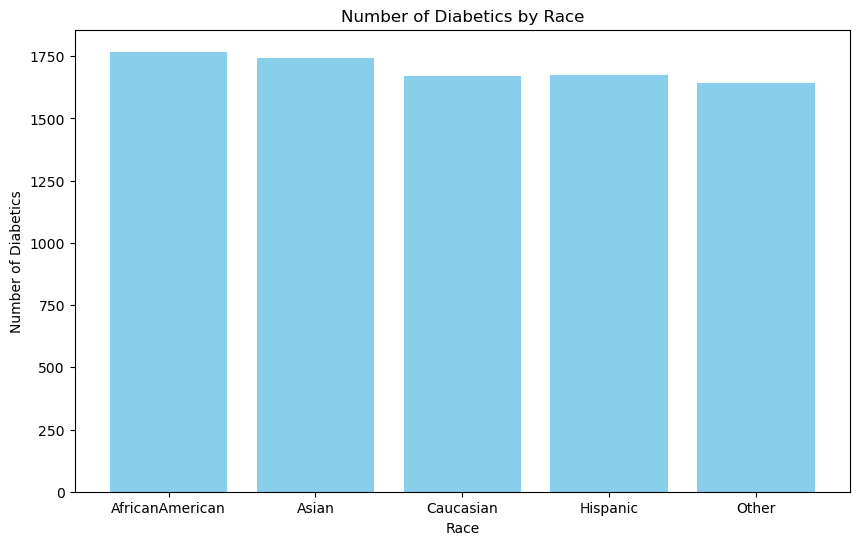

In [96]:
# Define the list of race columns
race_columns = ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']

# Define an empty dictionary to store value counts for each race
race_value_counts = {}

# Iterate through each race column and calculate value counts
for race_col in race_columns:
    filtered_data = dm_pd[(dm_pd['diabetes'] == 1) & (dm_pd[race_col] == 1)]
    value_counts = filtered_data[race_col].value_counts()
    print(f"Value counts for {race_col}:")
    print(value_counts)
    print()

    filtered_data = dm_pd[(dm_pd['diabetes'] == 1) & (dm_pd[race_col] == 1)]
    value_counts = filtered_data[race_col].value_counts()
    
    # Store the value count in the dictionary
    race_value_counts[race_col] = value_counts[1] if 1 in value_counts else 0

# Create a bar graph of races vs. number of diabetics
plt.figure(figsize=(10, 6))
plt.bar(race_value_counts.keys(), race_value_counts.values(), color='skyblue')
plt.xlabel('Race')
plt.ylabel('Number of Diabetics')
plt.title('Number of Diabetics by Race')
plt.show()

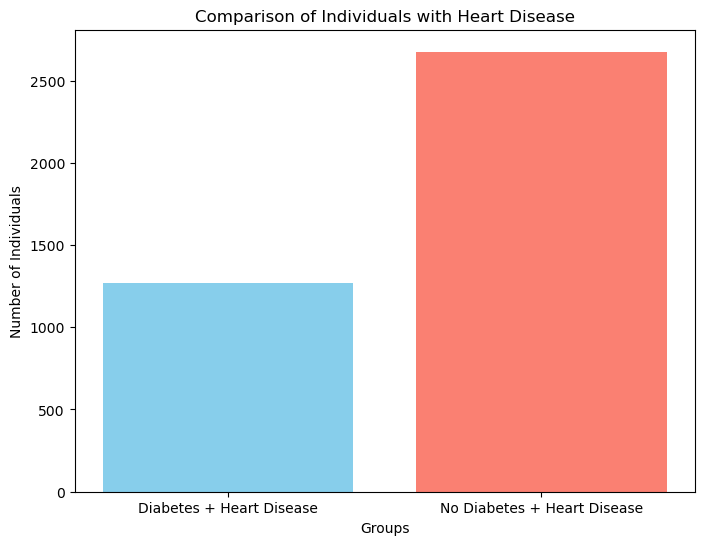

In [99]:
dmpos_cadpos = dm_pd[(dm_pd['diabetes'] == 1) & (dm_pd['heart_disease'] == 1)]
dmneg_cadpos = dm_pd[(dm_pd['diabetes'] == 0) & (dm_pd['heart_disease'] == 1)]


# Count the number of individuals in each group
count_dmpos_cadpos = len(dmpos_cadpos)
count_dmneg_cadpos = len(dmneg_cadpos)

# Create a bar graph to visualize the comparison
plt.figure(figsize=(8, 6))
plt.bar(['Diabetes + Heart Disease', 'No Diabetes + Heart Disease'], [count_dmpos_cadpos, count_dmneg_cadpos], color=['skyblue', 'salmon'])
plt.xlabel('Groups')
plt.ylabel('Number of Individuals')
plt.title('Comparison of Individuals with Heart Disease')
plt.show()


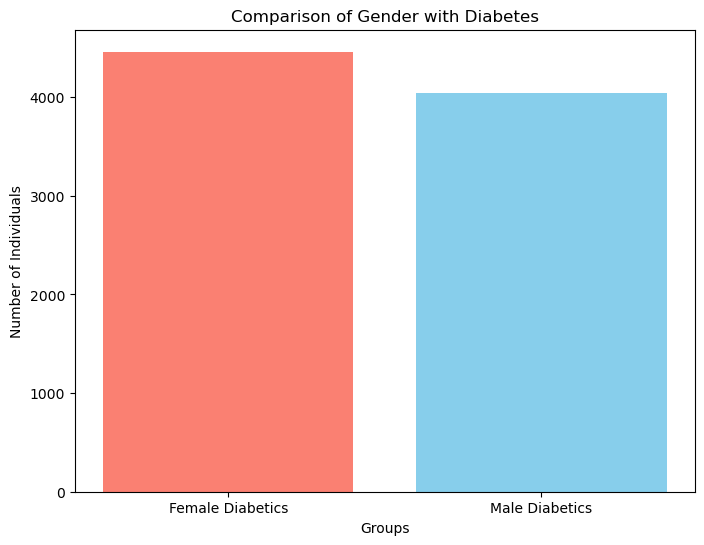

In [100]:
dm_female = dm_pd[(dm_pd['gender'] == 'Female') & (dm_pd['diabetes'] == 1)]
dm_male = dm_pd[(dm_pd['gender'] == 'Male') & (dm_pd['diabetes'] == 1)]


# Count the number of individuals in each group
count_dm_female = len(dm_female)
count_dm_male = len(dm_male)

# Create a bar graph to visualize the comparison
plt.figure(figsize=(8, 6))
plt.bar(['Female Diabetics', 'Male Diabetics'], [count_dm_female, count_dm_male], color=['salmon', 'skyblue'])
plt.xlabel('Groups')
plt.ylabel('Number of Individuals')
plt.title('Comparison of Gender with Diabetes')
plt.show()